In [7]:
import getDays

todayInfo = getDays.getToday()
yesterdayInfo = getDays.getYesterday()
print(todayInfo)
print(yesterdayInfo)
tomorrowInfo = getDays.getTomorrow()

month, month_num, date, year = todayInfo[0], todayInfo[1], todayInfo[2], todayInfo[3]
yesterday = yesterdayInfo[2]
yesterday = int(yesterday)
month_num = int(month_num)
nextDay = tomorrowInfo[2]
nextDay = int(nextDay)
date = int(date)

('October', '10', '24', '2023')
('October', '10', '23', '2023')


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import datetime
from datetime import datetime
import sqlalchemy
import mysql.connector
import sqlite3
import getDays
import pymysql as dbapi

#
# Now the Tempest F6 table
#

QUERY = """SELECT * FROM tempestF6 
           WHERE month = %s""" % (month_num)


db = dbapi.connect(host='3.135.162.69',user='chuckwx',passwd='jfr716!!00', database = 'tempestf6')

cur = db.cursor()
cur.execute(QUERY)
records = cur.fetchall()

qwe = ['Davis']

if qwe == 'Davis':
        df = pd.DataFrame(records, columns = ['index', 'Year', 'Month', 'Date', 'High', 'Low', 'Rainfall', 'Max_Dew_Point'])
        df = df.drop(df.columns[[0,6,7]], axis=1)
else:
        df = pd.DataFrame(records, columns = ['index', 'Year', 'Month', 'Date', 'High', 'Low', 'totR', 'corR', 'Lightning1_5', 'Lightning6_10'])
        df = df.drop(df.columns[[0,4,5,8,9]], axis=1)    

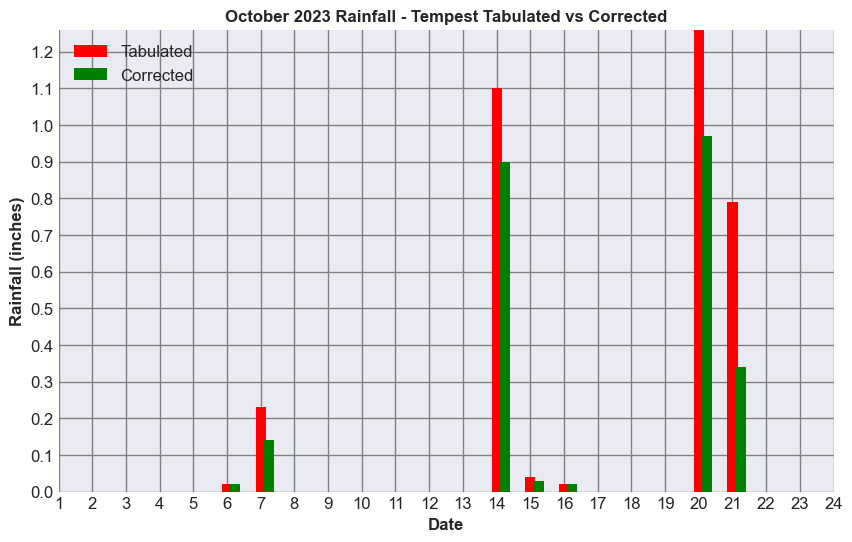

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import datetime

df['Date'] = df['Date'].astype(int)
df['totR'] = df['totR'].astype(float)
df['corR'] = df['corR'].astype(float)
    
TOTR = df['totR']
CORR = df['corR']
DATE = df['Date']

y = TOTR.to_numpy()
y1 = CORR.to_numpy()
x = DATE.to_numpy()

qwe = ['Tempest']
path1 = '/var/www/html/000/'
x_indexes = np.arange(1, date)
height = 0.0
width = 0.25
    
plt.style.use('seaborn-v0_8-dark')
    
path1 = '/var/www/html/000/'
plt.figure(figsize= (10,6))
plt.locator_params(axis = 'x', nbins = date)
plt.xlim(1, date)
plt.xticks(fontsize=12)
plt.xlabel('Date', fontsize=12, fontweight ='bold')
plt.yticks(fontsize=12)
plt.ylabel('Rainfall (inches)', fontsize=12, fontweight ='bold')
plt.locator_params(axis='y', nbins=20)
plt.title(f'{month} {year} Rainfall - Tempest Tabulated vs Corrected', fontsize=12, fontweight ='bold')
plt.grid(axis = "y", linewidth = 1.0, color = 'gray')
plt.grid(axis = "x", linewidth = 1.0, color = 'gray')


plt.bar(df['Date'], df['totR'], color ='red', width = 0.3, label = "Tabulated")
plt.bar((df['Date'] + width), df['corR'], color ='green', width = 0.3, label = "Corrected")
plt.autoscale(enable = True, axis = 'y', tight = True)
plt.legend(fontsize = 12)
plt.savefig(f'{path1}newRainTest')
#plt.show()